<a href="https://colab.research.google.com/github/sudhrathore/sudhanshu_AIMLBootcamp_Genzeon_2023/blob/main/Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd

column_names = ['label', 'sms_message']

# Read the tab-separated data file into a DataFrame
data_frame = pd.read_csv('/content/drive/MyDrive/SMSSpamCollection', sep='\t',names=column_names)



# Display the DataFrame
print(data_frame)

     label                                        sms_message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...
...    ...                                                ...
5567  spam  This is the 2nd time we have tried 2 contact u...
5568   ham               Will ü b going to esplanade fr home?
5569   ham  Pity, * was in mood for that. So...any other s...
5570   ham  The guy did some bitching but I acted like i'd...
5571   ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


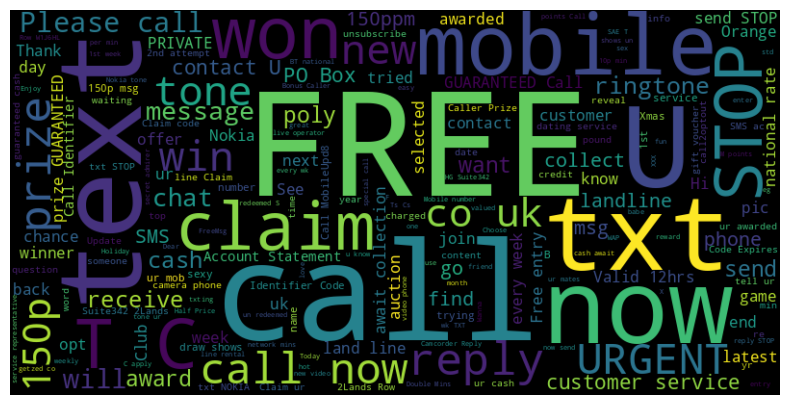

In [62]:
import matplotlib.pyplot as plt

from wordcloud import WordCloud
spam_messages = data_frame[data_frame['label'] == 'spam']

spam_text = ' '.join(spam_messages['sms_message'].tolist())


wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_text)


plt.figure(figsize=(10, 5))

plt.imshow(wordcloud, interpolation='bilinear')

plt.axis('off')

plt.show()


In [63]:

from collections import Counter

# Split the spam text into individual words
words = spam_text.split()

# Count the frequency of each word
word_counts = Counter(words)


# Get the most common words and their frequencies
most_common_words = word_counts.most_common()

# Display the most common words
for word, count in most_common_words:
    print(word, count)

to 607
a 360
your 187
call 185
or 185
the 178
2 169
for 169
you 164
is 143
Call 136
on 136
have 128
and 119
from 116
ur 107
with 101
& 98
4 93
of 93
FREE 89
mobile 81
You 77
are 77
our 76
To 73
claim 73
Your 71
U 70
txt 68
text 68
in 64
now 64
Txt 63
reply 58
free 56
contact 56
- 55
now! 49
be 48
just 48
u 47
send 46
this 46
won 45
get 45
only 45
Nokia 45
prize 44
per 44
STOP 44
been 43
service 43
who 43
Reply 42
new 42
cash 42
out 40
Text 39
will 39
This 39
stop 38
awarded 37
We 36
Free 35
Please 34
by 34
£1000 33
draw 33
URGENT! 32
Get 32
every 32
PO 31
shows 31
has 31
receive 30
customer 30
Claim 30
1 30
week 30
I 30
Just 30
win 28
Mobile 28
150ppm 28
number 28
phone 27
latest 26
16 26
at 26
1st 26
entry 25
selected 25
all 25
guaranteed 25
can 25
4* 24
any 24
For 24
that 23
Box 23
500 23
The 22
16+ 22
UR 22
as 22
know 22
18 22
so 22
an 22
£100 22
it 21
network 21
message 21
NOW 21
Holiday 21
attempt 21
CALL 21
8007 21
Valid 20
not 20
£2000 20
Send 20
me 20
weekly 20
2nd 20
up 19
WON

In [64]:
# Filter out the spam messages from the DataFrame
spam_messages = data_frame[data_frame['label'] == 'spam']


# Concatenate all the spam message contents into a single string
spam_text = ' '.join(spam_messages['sms_message'].tolist())

# Split the spam text into individual words
words = spam_text.split()

# Count the frequency of each word
word_counts = Counter(words)

# Set the number of most repeated words you want to retrieve
num_most_common = 30

# Get the most repeated words
most_common_words = word_counts.most_common(num_most_common)

# Display the most repeated words
for word, count in most_common_words:
    print(word, count)


to 607
a 360
your 187
call 185
or 185
the 178
2 169
for 169
you 164
is 143
Call 136
on 136
have 128
and 119
from 116
ur 107
with 101
& 98
4 93
of 93
FREE 89
mobile 81
You 77
are 77
our 76
To 73
claim 73
Your 71
U 70
txt 68


In [65]:
#Data Preprocessing

from sklearn.preprocessing import LabelEncoder

label_encoder=LabelEncoder()
data_frame['label']=label_encoder.fit_transform(data_frame['label'])

In [66]:
data_frame

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [67]:
#CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()

print(cv)


CountVectorizer()


In [68]:
#Splitting up the data
X=data_frame.drop(['label'],axis=1)
Y=data_frame[['label']]

from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [15]:
X_train

,sms_message
1978,Reply to win £100 weekly! Where will the 2006 ...
3989,Hello. Sort of out in town already. That . So ...
3935,How come guoyang go n tell her? Then u told her?
4078,Hey sathya till now we dint meet not even a si...
4086,Orange brings you ringtones from all time Char...
...,...
3772,"Hi, wlcome back, did wonder if you got eaten b..."
5191,"Sorry, I'll call later"
5226,Prabha..i'm soryda..realy..frm heart i'm sory
5390,Nt joking seriously i told


In [69]:
X_train.values.flatten()

array(['Reply to win £100 weekly! Where will the 2006 FIFA World Cup be held? Send STOP to 87239 to end service',
       'Hello. Sort of out in town already. That . So dont rush home, I am eating nachos. Will let you know eta.',
       'How come guoyang go n tell her? Then u told her?', ...,
       "Prabha..i'm soryda..realy..frm heart i'm sory",
       'Nt joking seriously i told',
       'Did he just say somebody is named tampa'], dtype=object)

In [70]:
#fit the training data & transform it

train_data=cv.fit_transform(X_train.values.flatten()) #1D array




In [71]:
train_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [72]:
test_data=cv.transform(X_test.values.flatten())

test_data.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [33]:
cv.get_feature_names_out(test_data)

array(['00', '000', '000pes', ..., 'zyada', 'èn', 'ú1'], dtype=object)

In [34]:
len(cv.get_feature_names_out(test_data))

7702

In [73]:
from sklearn.naive_bayes import MultinomialNB

model=MultinomialNB()
model.fit(train_data,Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [74]:
y_pred=model.predict(test_data)

In [75]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,Y_test)
accuracy

0.9919282511210762

In [56]:
accuracy_score(model.predict(train_data),Y_train)

0.9932690150325331

In [43]:
accuracy=model.score(cv.transform(X.values.flatten()),Y)

In [44]:
accuracy

0.9930007178750897

In [57]:
from sklearn.metrics import classification_report
print(classification_report(Y,model.predict(cv.transform(X.values.flatten()))))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4825
           1       0.98      0.96      0.97       747

    accuracy                           0.99      5572
   macro avg       0.99      0.98      0.98      5572
weighted avg       0.99      0.99      0.99      5572



In [ ]:
pip install gradio pandas scikit-learn

In [77]:
import gradio as gr

import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.tree import DecisionTreeClassifier




# # Load the spam detection model

# model = DecisionTreeClassifier()

# data_frame = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/SMSSpamCollection")

# vectorizer = TfidfVectorizer()

# X_train_transformed = vectorizer.fit_transform(data_frame['sms_message'])

# y_train = data_frame['label']

# model.fit(X_train_transformed, y_train)




# Define the prediction function

def spam_detection(email):

    transformed_email = cv.transform([email])

    prediction = model.predict(transformed_email)

    if prediction[0] == 'spam':

        return "This email is classified as SPAM."

    else:

        return "This email is classified as NOT SPAM."




# Create the Gradio interface

inputs = gr.inputs.Textbox(label="Enter Email Text")

outputs = gr.outputs.Textbox(label="Prediction")




gr.Interface(spam_detection, inputs, outputs, title="Spam Email Detection").launch()

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>